In [1]:
import math
from math import radians, degrees
import numpy as np
from scipy.integrate import RK45
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

m1 = 0.050
m2 = 0.100
r1 = 0.06
r2 = 0.06
I1 = 0.5*m1*r1**2
I2 = 0.5*m2*r2**2
r_j = 0.10
g = 9.81

def acrobot_dstate(state, tau):
    [theta1, dtheta1, theta2, dtheta2] = state

    # 352 operations
    x0 = I2**2
    x1 = I1**2
    x2 = m2**2
    x3 = r2**4
    x4 = x2*x3
    x5 = r2**2
    x6 = m2*x5
    x7 = m1**2
    x8 = r1**4*x7
    x9 = r_j**4
    x10 = I2*x2
    x11 = r1**2
    x12 = m1*x11
    x13 = r_j**2
    x14 = m2*x13
    x15 = I1*I2
    x16 = 2*x15
    x17 = m2*r_j
    x18 = math.cos(theta2)
    x19 = r2*x18
    x20 = x13*x5
    x21 = I1*x2
    x22 = x20*x21
    x23 = x10*x20
    x24 = I1*x6
    x25 = 2*x12
    x26 = I2*x12
    x27 = 2*x6
    x28 = 2*x26
    x29 = 2*x18
    x30 = r2**3
    x31 = r_j*x30
    x32 = x21*x31
    x33 = r_j**3
    x34 = x10*x33
    x35 = 2*x19
    x36 = m2**3
    x37 = math.sin(theta2)
    x38 = x37**2
    x39 = x36*x38
    x40 = x2*x20
    x41 = x2*x31
    x42 = x30*x33
    x43 = x38*x40
    x44 = I1*tau
    x45 = I2*tau
    x46 = math.sin(theta1)
    x47 = tau*x12
    x48 = dtheta1**2
    x49 = x37*x48
    x50 = r2*x49
    x51 = x17*x50
    x52 = dtheta2**2
    x53 = x37*x52
    x54 = r2*x53
    x55 = x17*x54
    x56 = dtheta1*dtheta2
    x57 = x37*x56
    x58 = r2*x57
    x59 = x17*x58
    x60 = tau*x40
    x61 = r1**3
    x62 = x0*x17
    x63 = 2*x37*x56
    x64 = r2*x63
    x65 = math.sin(theta1 + theta2)
    x66 = g*r2
    x67 = x65*x66
    x68 = m1*r1
    x69 = x17*x68
    x70 = I2*x69
    x71 = r2**5
    x72 = r_j*x36
    x73 = x71*x72
    x74 = x36*x37*x52
    x75 = x10*x13
    x76 = x10*x31
    x77 = math.sin(theta1 - theta2)
    x78 = x66*x77
    x79 = 2*theta2
    x80 = 2*x76
    x81 = g*x41*x68
    x82 = (1/2)*g*math.sin(x79 + theta1)
    x83 = x5*x82
    x84 = math.sin(x79)
    x85 = x41*x49
    x86 = x41*x53
    x87 = 3*theta2
    x88 = (1/2)*x36
    x89 = r_j*x2
    x90 = x83*x89
    x91 = g*x46
    x92 = I2*x91
    x93 = 2*x17
    x94 = m2*x67
    x95 = (1/2)*x67
    x96 = x13*x2
    x97 = (1/2)*x78
    ddth1_num = (I1*I2*g*m1*r1*x46 + I1*I2*g*m2*r_j*x46 + I1*g*m1*m2*r1*x46*x5 + (1/2)*I1*g*r_j*x2*x46*x5 + I1*m2*r2*r_j*tau*x18 + (1/2)*I1*x13*x2*x48*x5*x84 + 2*I2*dtheta1*dtheta2*x13*x2*x5*x84 + I2*g*m1*m2*r1*x13*x46 + 2*I2*g*m1*m2*r1*x46*x5 + I2*g*m1*m2*r_j*x11*x46 + (3/2)*I2*g*r_j*x2*x46*x5 + I2*g*x2*x33*x46 + I2*g*x46*x61*x7 + 3*I2*m2*r2*r_j*tau*x18 + (3/2)*I2*x13*x2*x48*x5*x84 + I2*x13*x2*x5*x52*x84 + 2*dtheta1*dtheta2*x13*x3*x36*x84 + g*m1*r1*x0*x46 + g*m1*r1*x13*x2*x46*x5 + g*m1*r1*x2*x3*x46 + (1/2)*g*m1*r_j*x11*x2*x46*x5 + g*m2*r_j*x0*x46 + g*m2*x46*x5*x61*x7 + (1/2)*g*r_j*x3*x36*x46 + (1/2)*g*x13*x30*x36*math.sin(x87 + theta1) - g*x13*x30*x77*x88 + (1/2)*g*x33*x36*x46*x5 + m1*m2*r2*r_j*tau*x11*x18 + (1/2)*m1*x11*x13*x2*x48*x5*x84 + r2*tau*x18*x2*x33 + 3*r_j*tau*x18*x2*x30 - r_j*x10*x83 - r_j*x21*x83 - r_j*x71*x74 - tau*x0 - tau*x15 - tau*x4 - x12*x45 - x12*x85 - x12*x86 - x12*x90 + (3/2)*x13*x3*x36*x48*x84 + x13*x3*x36*x52*x84 - x14*x45 - x15*x51 - x15*x55 - x16*x59 - x25*x41*x57 - x26*x51 - x26*x55 - x27*x45 - x28*x59 - x3*x72*x82 - x32*x49 - x32*x53 - x32*x63 - x33*x36*x83 - x34*x50 - x34*x54 - x34*x64 - 3/2*x36*x42*x49 - x36*x42*x63 + (1/2)*x36*x48*x5*x84*x9 - x42*x48*x88*math.sin(x87) - x42*x74 - x44*x6 - x47*x6 - x49*x73 - x49*x80 - x50*x62 - x53*x80 - x54*x62 - 4*x57*x76 - x60*math.cos(x79) - 2*x60 - x62*x64 - x63*x73 - x65*x81 - x67*x70 - x67*x75 - x70*x78 - x75*x78 - x77*x81)/(I1*x0 + I1*x4 + I2*x1 + I2*x8 + x0*x12 + x0*x14 + x1*x6 + x10*x9 + x12*x16 - x12*x29*x41 + x12*x4 + x12*x40 + x12*x43 + x13*x3*x39 + x14*x16 + x14*x28 - x16*x17*x19 + x16*x6 - x17*x26*x35 + x22*x38 + x22 + x23*x38 + x23 + x24*x25 + x26*x27 - x29*x32 - x29*x39*x42 - x34*x35 + x39*x5*x9 + x6*x8)
    ddth2_num = (I1*x51 - I1*x94 + I2*x51 + I2*x55 + I2*x58*x93 + tau*x14 - tau*x19*x93 + tau*x6 + x12*x51 - x12*x94 - x17*x92 + x2*x33*x50 - x40*x48*x84 - 1/2*x40*x52*x84 - x40*x56*x84 + x41*x63 + x44 + x45 + x47 - 1/2*x5*x89*x91 - x6*x68*x91 - x68*x92 + x69*x95 + x69*x97 + x85 + x86 + x90 - x95*x96 + x96*x97)/(I2*x14 + x12*x6 + x15 + x24 + x26 + x43)

    return [dtheta1, ddth1_num, dtheta2, ddth2_num]

def a_y(states, dstates):
    [theta1, dtheta1, theta2, dtheta2] = states
    [dtheta1, ddtheta1, dtheta2, ddtheta2] = dstates
    # 23 operations
    x0 = theta1 + theta2
    x1 = math.sin(x0)
    x2 = (dtheta1 + dtheta2)*math.cos(x0)
    a_1y = -r1*(ddtheta1*math.sin(theta1) + dtheta1**2*math.cos(theta1))
    a_2y = r2*(ddtheta1*x1 + ddtheta2*x1 + dtheta1*x2 + dtheta2*x2)
    return [a_1y, a_2y]

def simple_rk4(dynamics, t, y, dt):
    k1 = dt * dynamics(t, y)
    k2 = dt * dynamics(t + dt/2, y + k1/2)
    k3 = dt * dynamics(t + dt/2, y + k2/2)
    k4 = dt * dynamics(t + dt, y + k3)
    t_new = t + dt
    y_new = y + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t_new, y_new



def controlled_dynamics(t, state):
    #controller
    tau_max = 0.2
    v_max = 1000 * 2*np.pi/60
    tau = tau_max * (1 - state[3] / v_max)

    return acrobot_dstate(state, tau)
    


#         theta1, dtheta1, theta2, dtheta2
# state = [radians(30), 0, radians(45), 0]
# state = [radians(0), 0, radians(0), 0]
state = [radians(30), 0, radians(-30), 0]
ts = []
states = []
logs = []
t = 0
t_bound = 1
while t < t_bound:
    [theta1, dtheta1, theta2, dtheta2] = state

    if len(ts) % 10 == 0:
        #controller
        volt = 1 # from 0 to 1
    tau_max = 0.2
    omega_max = 1000 * 2*np.pi/60
    tau = tau_max * (volt - dtheta2/omega_max)


    def controlled_dynamics(t, state):
        return np.array(acrobot_dstate(state, tau))
    [t, state] = simple_rk4(controlled_dynamics, t, state, dt=0.001)
    
    ''' 
    liftoff condition:
    normal force < 0 and y velocity > 0
    Fnet1 = Fn - m1*g - F12 = m1*a1_y
    Fnet2 = F12 - m2*g = m2*a2_y
    Fn = m1*a1_y + F12 
    F12 = m2*a2_y + m2*g
    Fn = m1*a1_y + m2*a2_y + m2*g

    v = r*ω
    a_euler = r*alpha
    a1 = v^2/r1*sin(theta1) + r*alpha1*cos(theta1)
    '''
    #get normal force
    dstate = acrobot_dstate(state, tau)
    [a1_y, a2_y] = a_y(state, dstate)

    Fn = m1*a1_y + m2*a2_y + m2*g
    
    ts.append(t)
    states.append(state)
    logs.append({
        'Fn': Fn,
        'tau': tau,
    })

    if(Fn < 0):
        break

ts = np.array(ts)
states = np.array(states)

# Convert logs from array of dicts to dict of arrays
log_arrays = {}
for key in logs[0].keys():
    log_arrays[key] = np.array([log[key] for log in logs])

print(f'simulated {len(ts)} steps')

simulated 105 steps


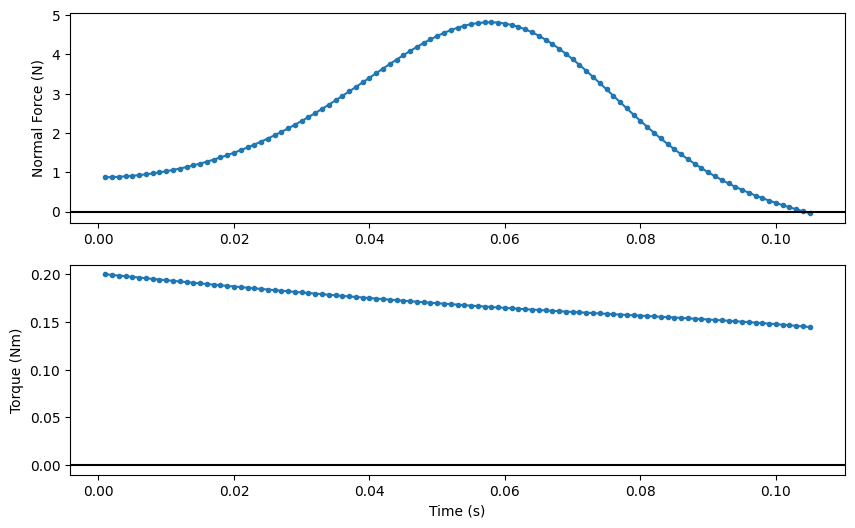

In [2]:
# Plot normal force over time
fig, axs = plt.subplots(2, 1, figsize=(10,6))
axs[0].plot(ts, log_arrays['Fn'], '.-')
axs[0].axhline(0, color='black')
axs[0].set_ylabel('Normal Force (N)')
axs[1].plot(ts, log_arrays['tau'], '.-')
axs[1].axhline(0, color='black')
axs[1].set_ylabel('Torque (Nm)')
plt.xlabel('Time (s)')
plt.show()


In [3]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Animation function
def animate(frame):
    ax.clear()

    th1 = states[frame, 0]
    th2 = states[frame, 2]

    x1 = -r1 * np.sin(th1)
    y1 = r1 * np.cos(th1)
    xj = -r_j * np.sin(th1)
    yj = r_j * np.cos(th1)
    x2 = xj + r2 * np.sin(th1 + th2)
    y2 = yj - r2 * np.cos(th1 + th2)
    
    # Plot origin point
    ax.plot(0, 0, 'ko', markersize=10, label='Origin')
    
    # Plot first link (origin to joint)
    ax.plot([0, xj], [0, yj], 'b-', linewidth=2, label='Link 1')
    
    # Plot second link (joint to end)
    ax.plot([xj, x2], [yj, y2], 'r-', linewidth=2, label='Link 2')
    
    # Plot point P1
    ax.plot(x1, y1, 'go', markersize=8, label='P1')
    
    # Plot joint point
    ax.plot(xj, yj, 'mo', markersize=8, label='Joint')
    
    # Plot end point
    ax.plot(x2, y2, 'ko', markersize=8, label='P2')
    
    # Set equal aspect ratio and limits
    ax.set_aspect('equal')
    ax.set_xlim(-0.2, 0.2)
    ax.set_ylim(-0.05, 0.2)
    
    # Add grid and legend
    ax.grid(True)
    ax.legend()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(f'2D Linkage Visualization {log_arrays["Fn"][frame]:.2f} N')


# Create animation
anim = FuncAnimation(fig, animate, frames=len(states), 
                    interval=20, blit=False)
print('done making animation, saving gif')
# Save as GIF
writer = PillowWriter(fps=50)
anim.save('gifs/acrobot_motion_30_-30.gif', writer=writer)
plt.close()

done making animation, saving gif
